In [13]:
%load_ext autoreload
%autoreload 2

# general
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from src.economics import run_economic_analysis
from src.plots import plot_utils
from src.economics import plotting

# data = run_economic_analysis.step_load_data(verbose=False)
# aligned = run_economic_analysis.step_align_data(data, verbose=True)

# # total_tourism_value_gdf.groupby("country")["approx_price_corrected"].sum().sort_values(ascending=False).head(10)
# total_tourism_value_gdf["approx_price_corrected"].sum() / 1e9
# # TODO: this (load_tourism_data) isn't matching with my implementation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# plot the coral change spatially as a scatter
my_config = SpatialPlotConfig(
    # central_longitude=180,
    extent=EXTENT_PRESETS["florida_focus"],
    explode_factor=1,
    # vmin=1,
    # vmax=1e7,
    # logarithmic_cbar=True,
    title="",
    figsize=(12, 8),
)


fig, ax = plotting.plot_spatial_distribution(
    gdf,
    plot_column="coral_change",
    config=my_config,
    # explode_factor=1,
    # bbox=(-83.5, 24, -80, 25),
)

In [1]:
%load_ext autoreload
%autoreload 2

# general
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from src.economics import run_economic_analysis
from src.plots import plot_utils
from src.economics import plotting

from src.plots.plot_config import SpatialPlotConfig, EXTENT_PRESETS

prev_results = run_economic_analysis.load_previous_results("run_20260123_084349")
gdf = prev_results["results"].results["tourism_RCP85_yr_2100_Linear_(3.81%_pp)"].gdf


LOADING PREVIOUS RESULTS
  Loading from: /Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/reef_cover_economics/results/run_20260123_084349
  ✓ Loaded 12 cumulative impact results

  ✓ Loaded 12 analysis results
  ✓ Loaded 12 cumulative impact results


count    7714.000000
mean        0.581010
std         1.078609
min        -1.295278
25%        -0.347903
50%         0.873411
75%         1.512604
max         1.877857
Name: diversity.standardized, dtype: float64


(7714, 92)

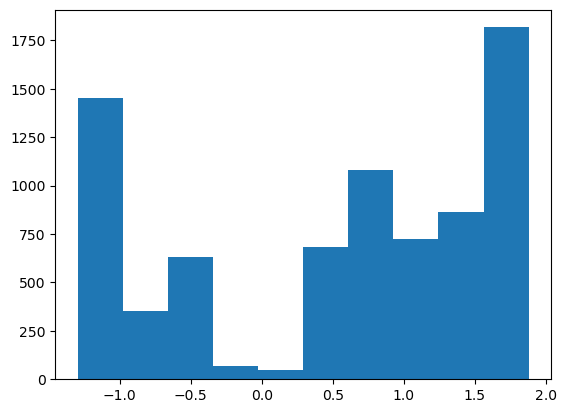

In [ ]:
df = pd.read_csv(
    "/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/reef_cover_economics/data/sully_2022/data_for_maps.csv"
)
plt.hist(df["diversity.standardized"])
print(df["diversity.standardized"].describe())

Using threshold logarithmic colorbar: grey for values < 10.0, log scale for >= 10.0
0.09337566137566138 0.08586002886002886 0.10089129389129389 0.07837566137566138
0.03886002886002886 0.05386002886002886
0.15723569023569023 0.029515632515632516


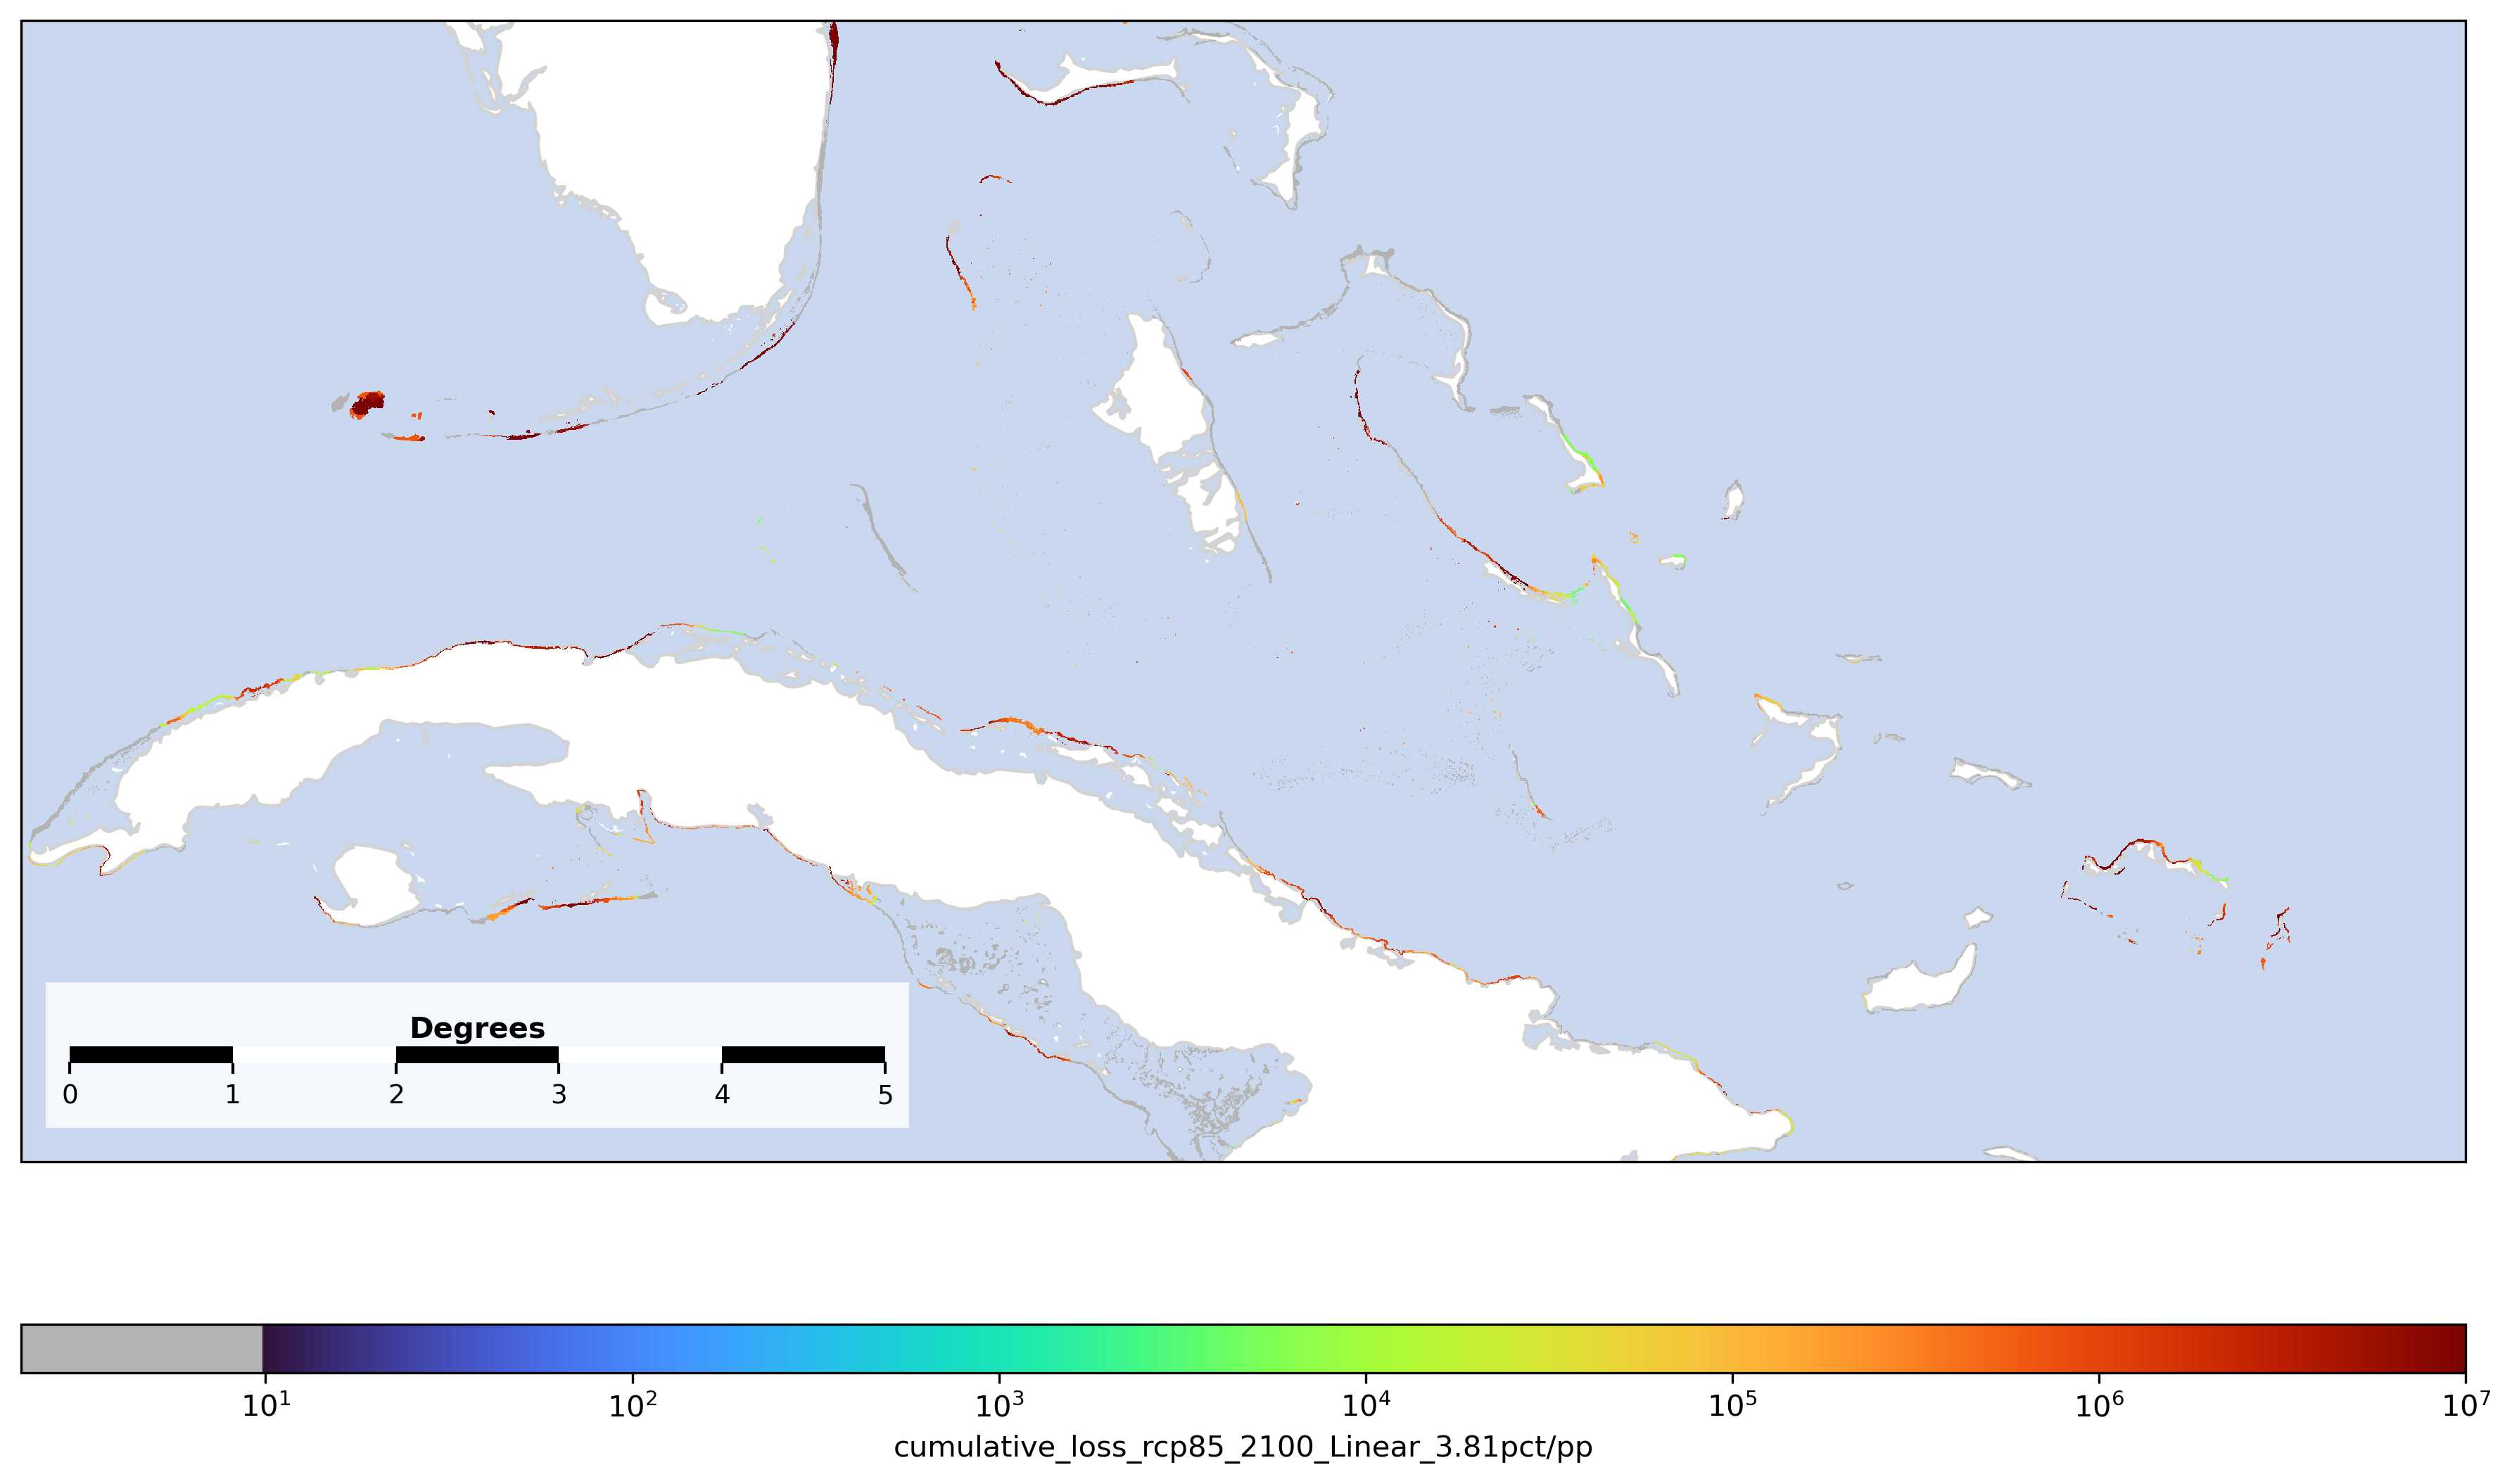

In [5]:
my_config = SpatialPlotConfig(
    # central_longitude=180,
    extent=EXTENT_PRESETS["florida_focus"],
    explode_factor=1,
    # vmin=1,
    vmax=1e7,
    logarithmic_cbar=True,
    title="",
    figsize=(12, 8),
    show_scalebar=True,
    scalebar_linewidth=5,
    scalebar_length=5,
    # scalebar_location=[0.05, 0.08],
    scalebar_frame=True,
    scalebar_loc="lower left",
    scalebar_segments=5,
)

# Use it for plotting
fig, ax = plotting.plot_spatial_distribution(
    # gdf[::100],
    gdf,
    plot_column="cumulative_loss_rcp85_2100_Linear_3.81pct/pp",
    config=my_config,
)


Three models:
1. Linear – for every absolute change in coral cover by 1%, a decrease in original value by 3.81% (after Chen et al). Once value is zero, stay there
2. Compound – for every absolute change in coral cover, a decrease in value at previous cover value.
3. Tipping point – the compound decrease described before, until the coral cover dips below 0.1: at this point, value goes to zero.

/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/reef_cover_economics/src/economics/plotting.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  "tourism": "#2ecc71",  # Green
/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/reef_cover_economics/src/economics/plotting.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  "protection": "#9b59b6",  # Purple
/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/reef_cover_economics/src/economics/plotting.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  "tourism": "#2ecc71",  # Green
/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/camb

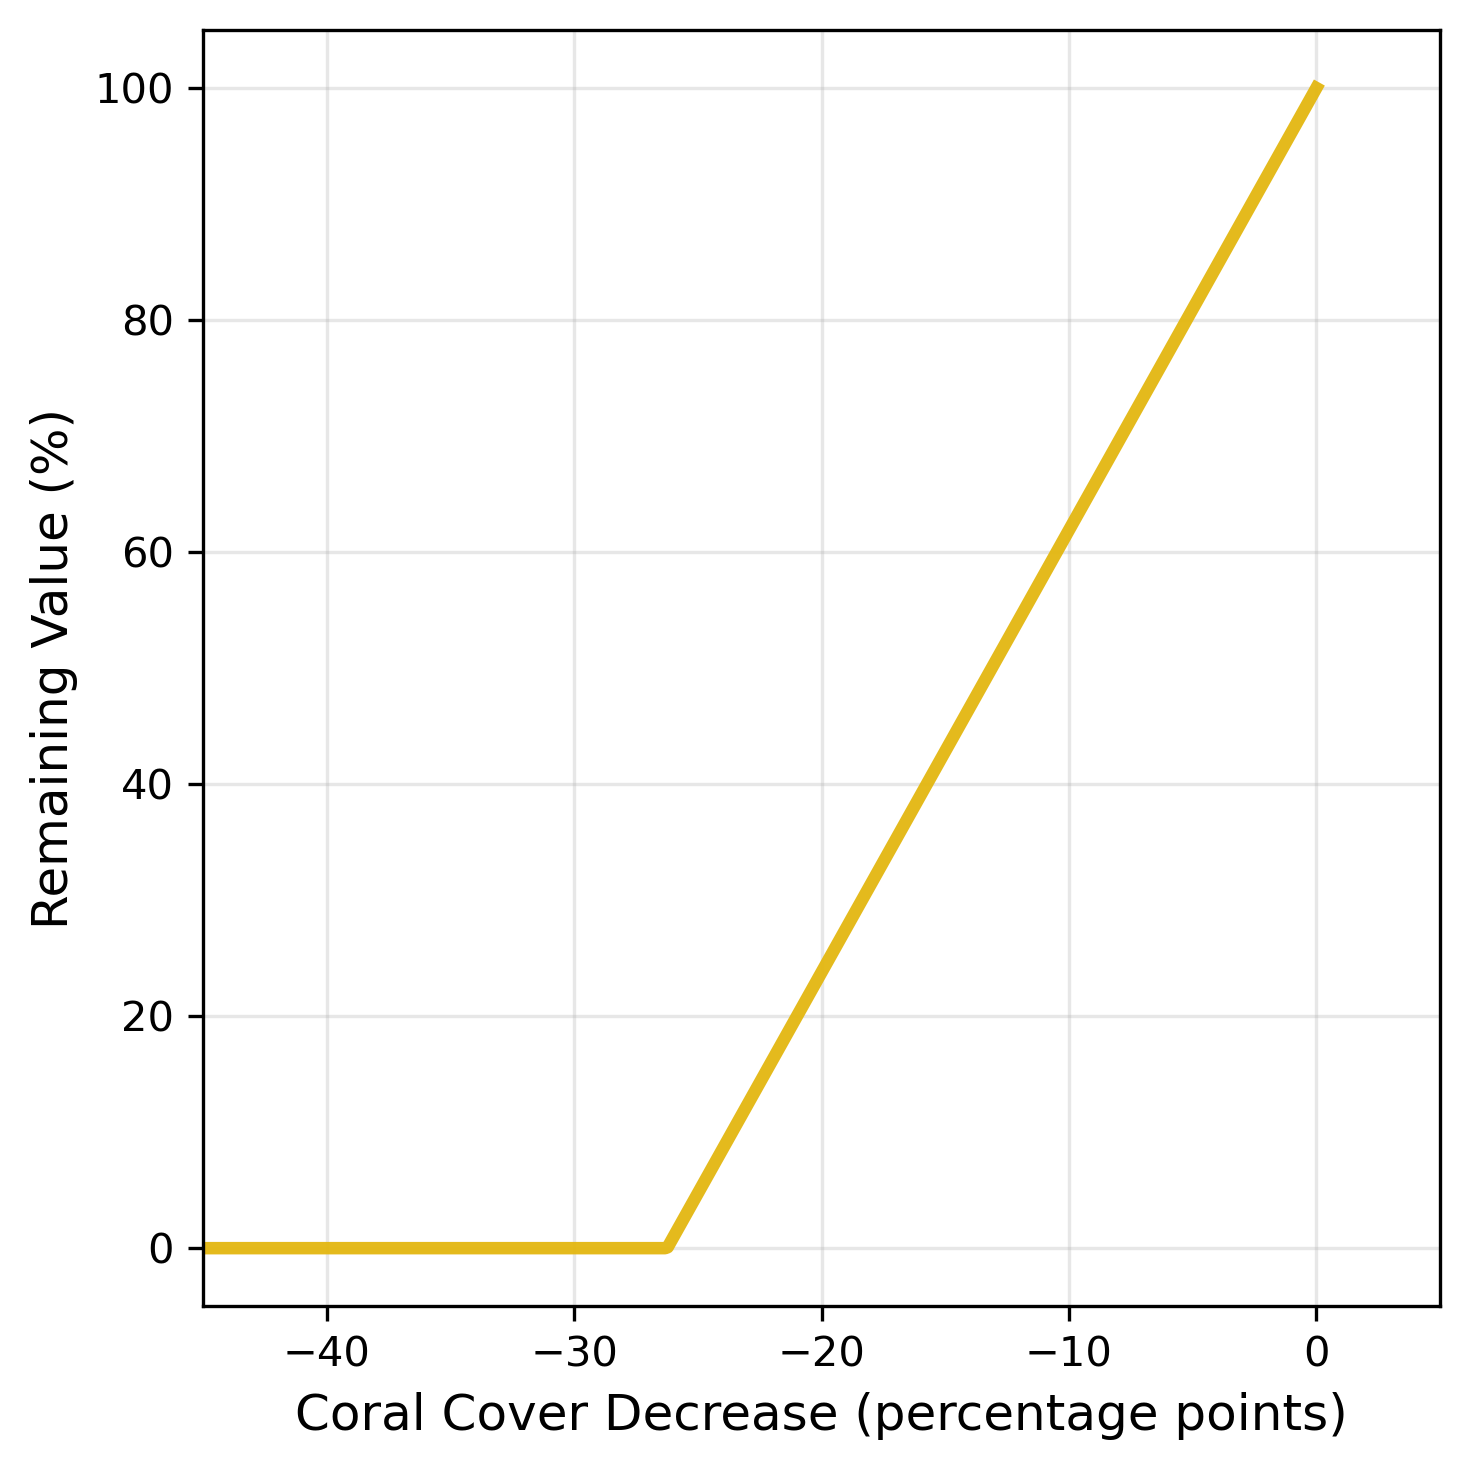

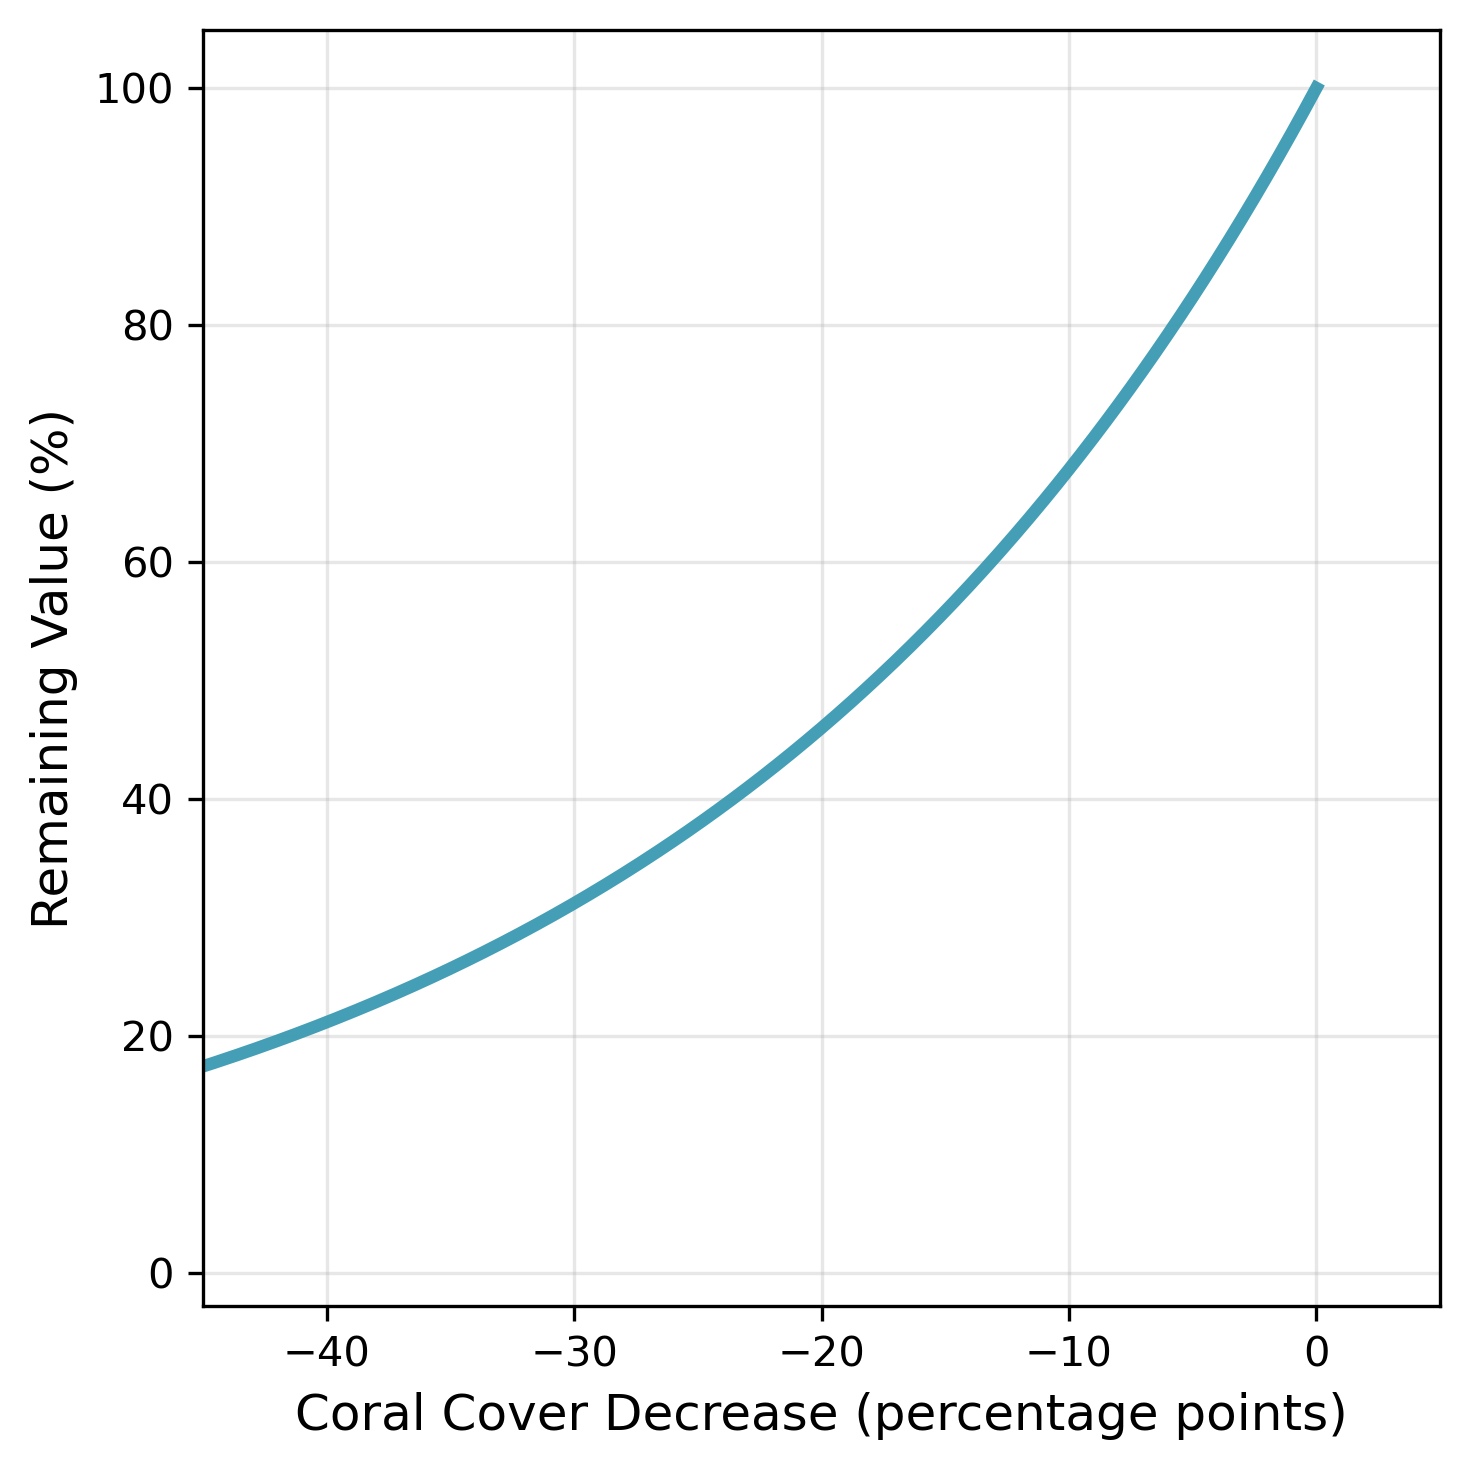

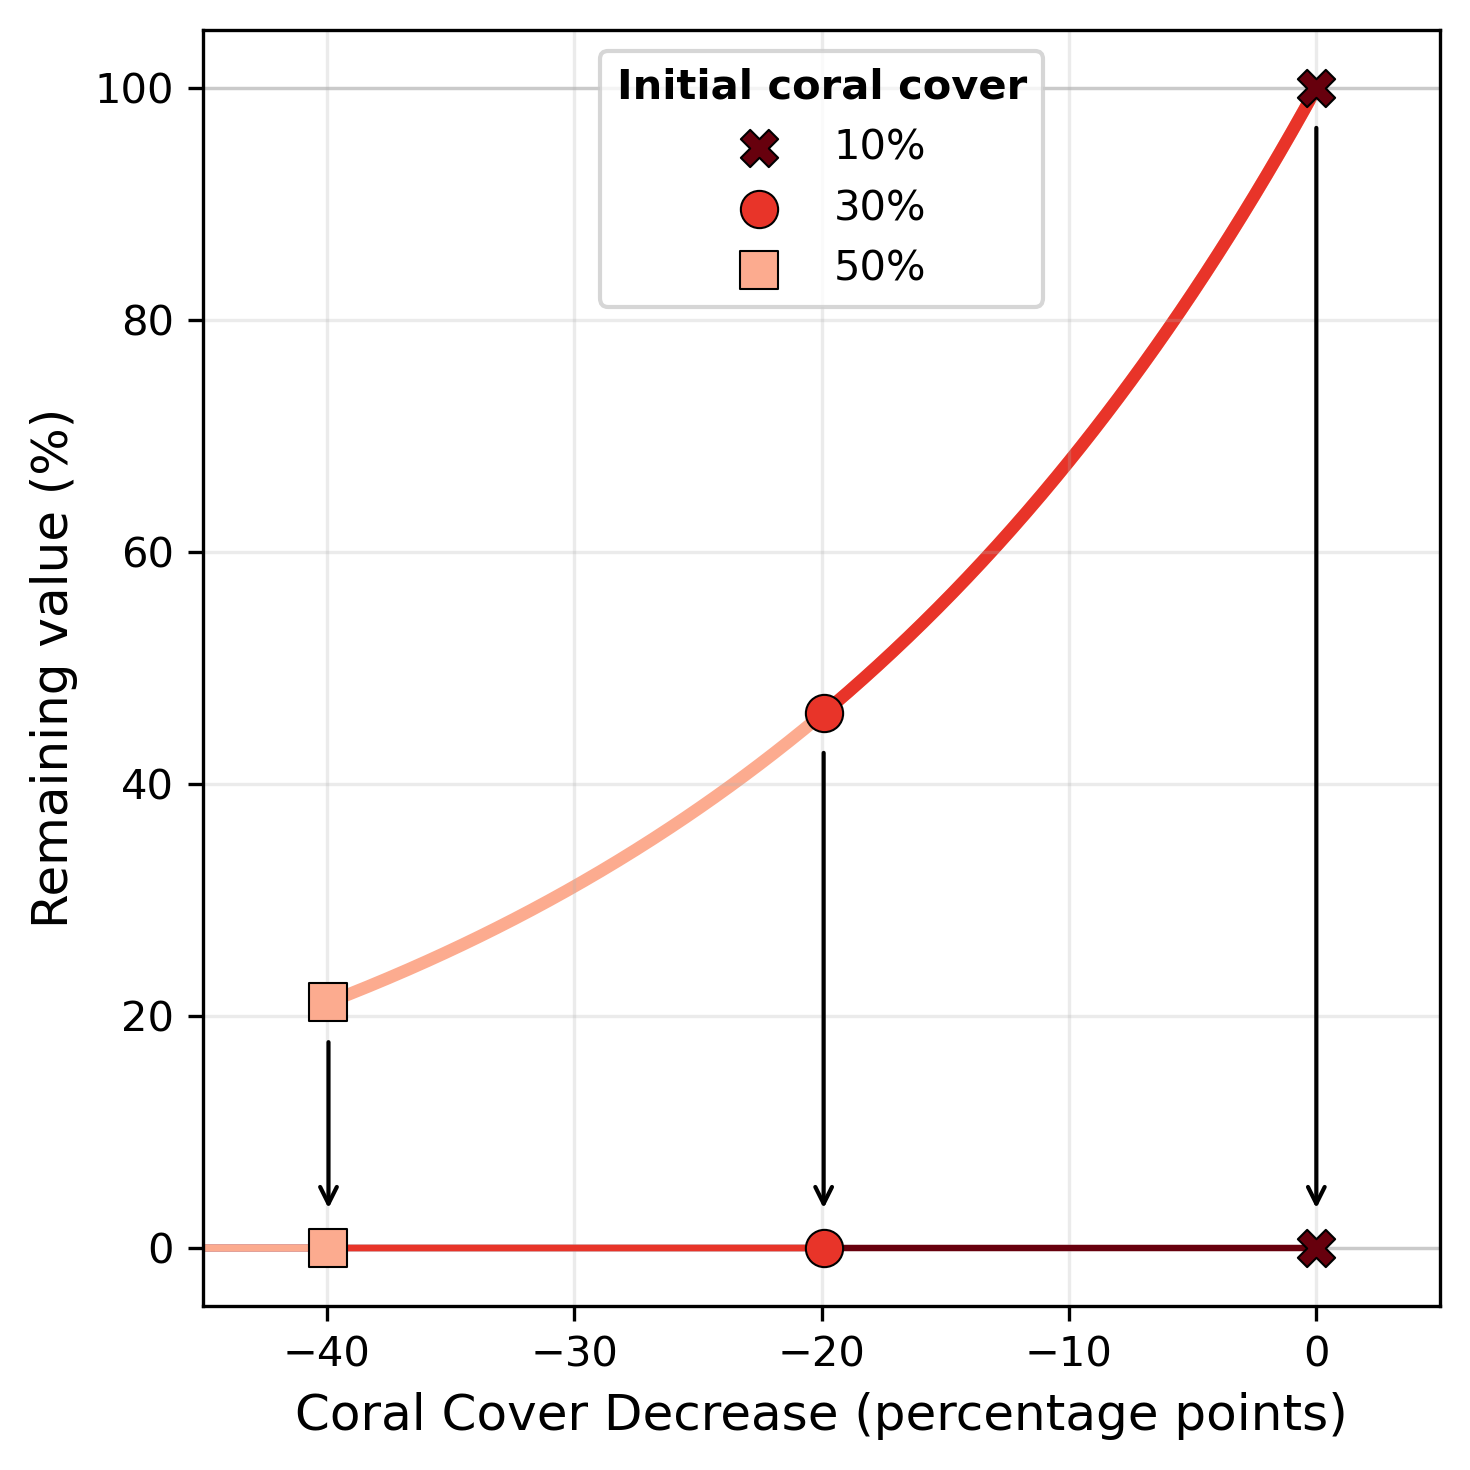

In [22]:
from src.economics.depreciation_models import (
    LinearModel,
    CompoundModel,
    TippingPointModel,
)

for m in [LinearModel(), CompoundModel()]:
    plotting.plot_non_tipping_point_model(
        non_tipping_point_model=m,
    )
plotting.plot_tipping_point_model(
    tipping_point_model=TippingPointModel(),
);


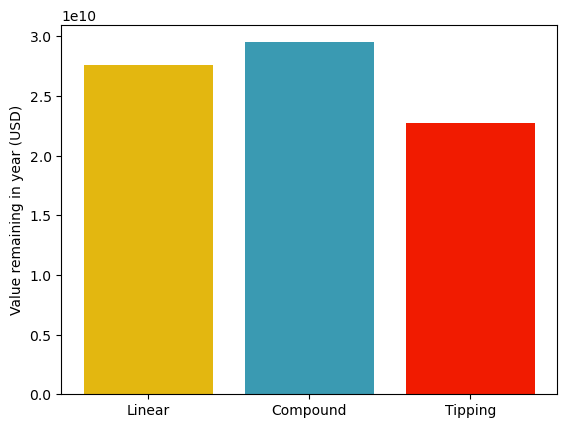

In [ ]:
### calculate the cumulative results of each of the models
from src.plots import plot_config

gdf = prev_results["results"].results["tourism_RCP85_yr_2100_Linear_(3.81%_pp)"].gdf

res = []
models = [LinearModel(), CompoundModel(), TippingPointModel()]
cs = plot_config.MODEL_COLORS
for i, (m, c) in enumerate(zip(models, cs)):
    if isinstance(m, TippingPointModel):
        # TippingPointModel requires original_cc; pass it explicitly
        out = m.calculate(
            delta_cc=gdf["nearest_y_future_rcp45_yr_2100_change"],
            value=gdf["original_value"],
            original_cc=gdf["nearest_average_coral_cover"],
        )
    else:
        out = m.calculate(
            delta_cc=gdf["nearest_y_future_rcp45_yr_2100_change"],
            value=gdf["original_value"],
        )
    res.append(out)

# plot a bar chart of the sums
plt.bar(range(3), [np.sum(r) for r in res], color=cs.values())
plt.xticks(range(3), ["Linear", "Compound", "Tipping"])
plt.ylabel("Value remaining in year (USD)");

In [2]:
data = run_economic_analysis.step_load_data(verbose=False)
aligned_data = run_economic_analysis.step_align_data(data, verbose=True)

✓ Loaded GDP data: 257 countries for year 2022

STEP 2: SPATIAL ALIGNMENT

────────────────────────────────────────────────────────────
🔗 SPATIAL ALIGNMENT COMPLETE
────────────────────────────────────────────────────────────
  Economic sites: 63,180
  Coral cover sites: 7,714
  Max distance threshold: 5.0°

  📍 Alignment Results:
     Within threshold: 60,812 (96.3%)
     Beyond threshold: 2,368 (3.7%)

  📏 Distance Statistics:
     Min: 0.0001°
     Max: 19.74°
     Mean: 1.43°
     Median: 0.93°
     P95: 4.51°

  📋 Columns added (10):
     - nearest_average_coral_cover
     - nearest_y_new
     - nearest_y_future_rcp45_yr_2050
     - nearest_y_future_rcp45_yr_2100
     - nearest_y_future_rcp85_yr_2050
     ... and 5 more
────────────────────────────────────────────────────────────


  Tourism alignment: 96.3% within threshold
  Distance stats: mean=1.43°, max=19.74°


In [9]:
from src.economics import depreciation_models

run_economic_analysis.step_cumulative_impact(
    aligned_data=aligned_data,
    models=[
        depreciation_models.LinearModel(),
        depreciation_models.CompoundModel(),
        depreciation_models.TippingPointModel(),
    ],
    # models=[depreciation_models.LinearModel()],
    data=data,
)



STEP 4b: CUMULATIVE IMPACT ANALYSIS (Per-Site Calculation)

  Tourism:
	Valid sites: 30613 / 63180
		Missing (nan) baseline covers: 0
		Missing (nan) or zero baseline values: 31697
	Mean baseline cover: 33.0%
	Total baseline value: $35.63B

    Scenario endpoints (mean across sites):
      RCP45: {2050: np.float64(0.29803107834539616), 2100: np.float64(0.2803681073804164)}
      RCP85: {2050: np.float64(0.28519686213578055), 2100: np.float64(0.22148887262638084)}
      Calculating rcp45 (linear) for 30613 sites...
        ✓ Processed 30613 sites, cumulative loss: $0.36T
      Calculating rcp45 (exponential) for 30613 sites...
        ✓ Processed 30613 sites, cumulative loss: $0.36T
      Calculating rcp85 (linear) for 30613 sites...
        ✓ Processed 30613 sites, cumulative loss: $0.63T
      Calculating rcp85 (exponential) for 30613 sites...
        ✓ Processed 30613 sites, cumulative loss: $0.64T

    rcp45_linear (Linear (3.81%/pp)):
      Cumulative loss: $0.36T
      Final annu

{'tourism_rcp45_linear_Linear (3.81%/pp)': CumulativeImpactResult(trajectory=CoverTrajectory(years=array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
        2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034,
        2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045,
        2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056,
        2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067,
        2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078,
        2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089,
        2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100]), covers=array([0.33044132, 0.32956536, 0.32868941, 0.32781346, 0.32693751,
        0.32606155, 0.3251856 , 0.32430965, 0.3234337 , 0.32255774,
        0.32168179, 0.32080584, 0.31992989, 0.31905394, 0.31817798,
        0.31730203, 0.31642608, 0.31555013, 0.31467417, 0.31379822,
        0.31292227, 0.31204632

In [ ]:
from src.economics.depreciation_models import (
    LinearModel,
    CompoundModel,
    TippingPointModel,
)
from src.economics import cumulative_impact

interpolation_method = "linear"
endp

# get model
linear_model = LinearModel()
# linear_model

points = [
    cumulative_impact.TrajectoryPoint(year=year, cover=cover)
    for year, cover in sorted(endpoints.items())
]

In [ ]:
trajectory = cumulative_impact.interpolate_linear(2017, baseline_cover, points)

In [ ]:
cumulative_impact.calculate_cumulative_impact(
    0.5,
    100,
)

{'tourism_rcp45_linear_linear_3.81_pp': CumulativeImpactResult(trajectory=CoverTrajectory(years=array([2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027,
        2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038,
        2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049,
        2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060,
        2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071,
        2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082,
        2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093,
        2094, 2095, 2096, 2097, 2098, 2099, 2100]), covers=array([0.35160281, 0.35060071, 0.34959862, 0.34859653, 0.34759443,
        0.34659234, 0.34559024, 0.34458815, 0.34358606, 0.34258396,
        0.34158187, 0.34057977, 0.33957768, 0.33857559, 0.33757349,
        0.3365714 , 0.3355693 , 0.33456721, 0.33356512, 0.33256302,
        0.33156093, 0.33055883, 0.32955674, 0.32855465, 0

In [ ]:
cum_data.head()

,key,scenario,interpolation,model,years,coral_cover,annual_value,annual_loss,cumulative_loss,baseline_value,total_cumulative_loss
0,tourism_rcp45_linear_Linear (3.81%/pp),rcp45,linear,Linear (3.81%/pp),"[2017, 2018, 2019, 2020, 2021, 2022, 2023, 202...","[35.160280865618624, 35.06007146518417, 34.959...","[35.626255, 35.49023473661022, 35.354214473220...","[0.0, 0.13602026338977802, 0.27204052677955604...","[0.0, 0.000136020263389, 0.000408060790169, 0....",35.626255,0.361030
1,tourism_rcp45_exponential_Linear (3.81%/pp),rcp45,exponential,Linear (3.81%/pp),"[2017, 2018, 2019, 2020, 2021, 2022, 2023, 202...","[35.160280865618624, 35.05519831368885, 34.950...","[35.626255, 35.48362011415905, 35.341411517227...","[0.0, 0.14263488584095002, 0.28484348277210203...","[0.0, 0.00014263488584, 0.00042747836861300006...",35.626255,0.362802
2,tourism_rcp85_linear_Linear (3.81%/pp),rcp85,linear,Linear (3.81%/pp),"[2017, 2018, 2019, 2020, 2021, 2022, 2023, 202...","[35.160280865618624, 35.02056215764191, 34.880...","[35.626255, 35.43660637045947, 35.246957740918...","[0.0, 0.18964862954052703, 0.37929725908105405...","[0.0, 0.00018964862954000002, 0.00056894588862...",35.626255,0.646645
3,tourism_rcp85_exponential_Linear (3.81%/pp),rcp85,exponential,Linear (3.81%/pp),"[2017, 2018, 2019, 2020, 2021, 2022, 2023, 202...","[35.160280865618624, 35.01083080312799, 34.862...","[35.626255, 35.423397416026205, 35.22140208564...","[0.0, 0.20285758397379303, 0.404852914351905, ...","[0.0, 0.00020285758397300003, 0.00060771049832...",35.626255,0.658041
4,tourism_rcp45_linear_Compound (3.81%/pp),rcp45,linear,Compound (3.81%/pp),"[2017, 2018, 2019, 2020, 2021, 2022, 2023, 202...","[35.160280865618624, 35.06007146518417, 34.959...","[35.626255, 35.48784535689033, 35.349973441625...","[0.0, 0.138409643109664, 0.276281558374923, 0....","[0.0, 0.000138409643109, 0.000414691201484, 0....",35.626255,0.342106


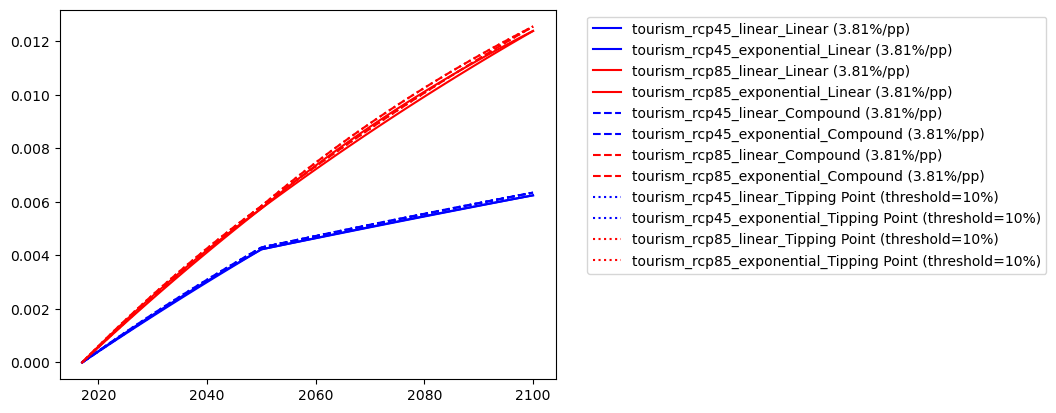

In [57]:
cum_data = pd.read_json(
    "/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/reef_cover_economics/docs/exported_data/trajectories.json"
)

fig, ax = plt.subplots()

model_ls = {
    "linear": "-",
    "compound": "--",
    "tipping": ":",
}
scenario_color = {
    "rcp45": "blue",
    "rcp85": "red",
}

for i, row in cum_data.iterrows():
    label = row["key"]
    if "tipping" in label.lower():
        ls = model_ls["tipping"]
    elif "compound" in label.lower():
        ls = model_ls["compound"]
        # continue
    else:
        ls = model_ls["linear"]
        # continue
    if "rcp45" in label:
        color = scenario_color["rcp45"]
    else:
        color = scenario_color["rcp85"]
    ax.plot(row["years"], row["cumulative_loss"], label=label, ls=ls, color=color)
ax.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


In [28]:
gdf.columns

Index(['bin_global', 'sum_gridco', 'sum_no_cel', 'sum_sq_km', 'shape_leng',
       'shape_area', 'approx_price', 'geometry', 'country', 'iso_a3',
       'correction_factor', 'approx_price_corrected',
       'nearest_average_coral_cover', 'nearest_y_new',
       'nearest_y_future_rcp45_yr_2050', 'nearest_y_future_rcp45_yr_2100',
       'nearest_y_future_rcp85_yr_2050', 'nearest_y_future_rcp85_yr_2100',
       'nearest_y_future_rcp45_yr_2050_change',
       'nearest_y_future_rcp45_yr_2100_change',
       'nearest_y_future_rcp85_yr_2050_change',
       'nearest_y_future_rcp85_yr_2100_change', 'distance_to_coral_site',
       'original_value', 'coral_change', 'remaining_value', 'value_loss',
       'loss_fraction', 'cumulative_loss_rcp85_2100_Linear_3.81pct/pp',
       'cumulative_loss_fraction_rcp85_2100_Linear_3.81pct/pp'],
      dtype='object')

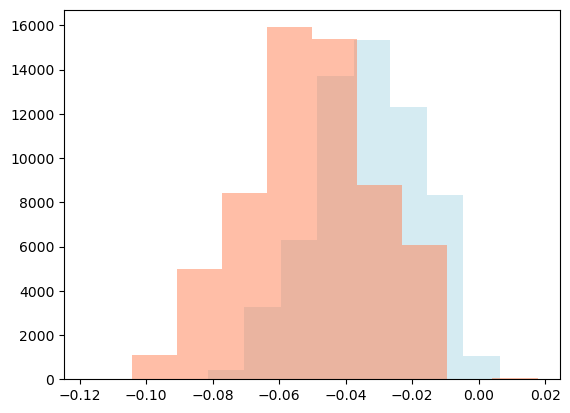

In [31]:
plt.hist(gdf["nearest_y_future_rcp45_yr_2050_change"], alpha=0.5, color="lightblue")
plt.hist(gdf["nearest_y_future_rcp45_yr_2100_change"], alpha=0.5, color="coral");

(0.0, 10000000.0)

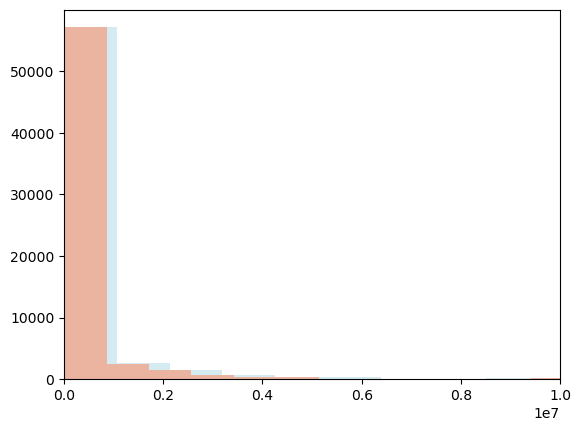

In [45]:
plt.hist(
    calculate_compound(
        gdf["nearest_y_future_rcp45_yr_2100_change"], gdf["original_value"]
    ),
    alpha=0.5,
    color="lightblue",
    bins=100,
)
plt.hist(
    calculate_compound(
        gdf["nearest_y_future_rcp85_yr_2100_change"], gdf["original_value"]
    ),
    alpha=0.5,
    color="coral",
    bins=100,
)
plt.xlim(0, 1e7)

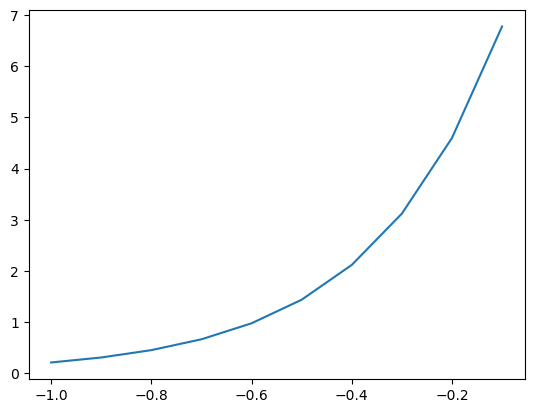

In [ ]:
calculate(gdf["nearest_y_future_rcp85_yr_2050_change"], gdf["original_value"])


array([      0.        ,       0.        ,       0.        , ...,
       5609198.71830286, 5609198.71830286, 5609198.71830286],
      shape=(63180,))

In [10]:
gdf.nearest_average_coral_cover

0            NaN
1            NaN
2        0.39375
3        0.39375
4        0.39375
          ...   
63175        NaN
63176        NaN
63177        NaN
63178        NaN
63179        NaN
Name: nearest_average_coral_cover, Length: 63180, dtype: float64

(array([ 4591.,  9064.,  8366.,  7455.,  7880., 12192.,  5518.,  1886.,
         3526.,   334.]),
 array([0.00625 , 0.093125, 0.18    , 0.266875, 0.35375 , 0.440625,
        0.5275  , 0.614375, 0.70125 , 0.788125, 0.875   ]),
 <BarContainer object of 10 artists>)

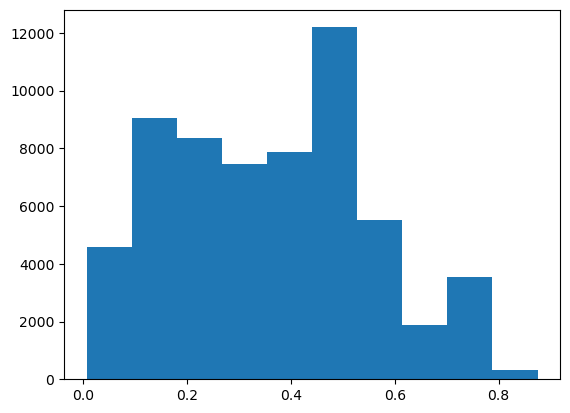

In [7]:
plt.hist(gdf.nearest_average_coral_cover)

In [ ]:
run_economic_analysis.run_pipeline(verbose=True)

-116733469.08634761


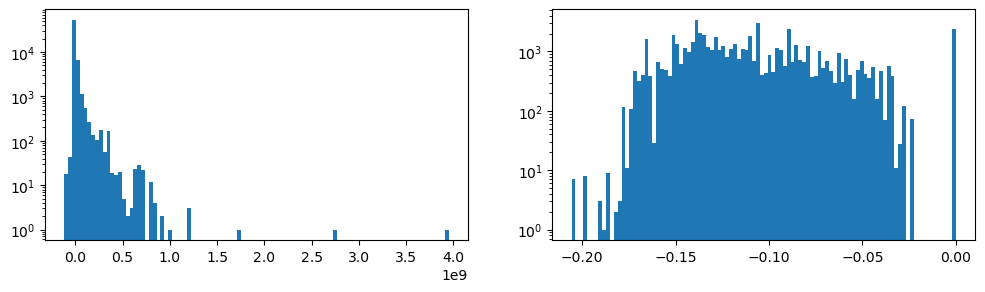

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3))
ax[0].hist(
    prev_results["results"]
    .results["tourism_RCP85_yr_2100_Linear_(3.81%_pp)"]
    .gdf["cumulative_loss_rcp85_2100_Linear_3.81pct/pp"],
    bins=100,
)
ax[1].hist(
    prev_results["results"]
    .results["tourism_RCP85_yr_2100_Linear_(3.81%_pp)"]
    .gdf["coral_change"],
    bins=100,
)
[a.set_yscale("log") for a in ax]
print(gdf["cumulative_loss_rcp85_2100_Linear_3.81pct/pp"].min())

vmin_val: 0.000e+00, vmax_val: 1.000e+07
0.08 0.07248436748436748 0.08751563251563252 0.065
0.03886002886002886 0.053860028860028865
0.14386002886002888 0.016139971139971135


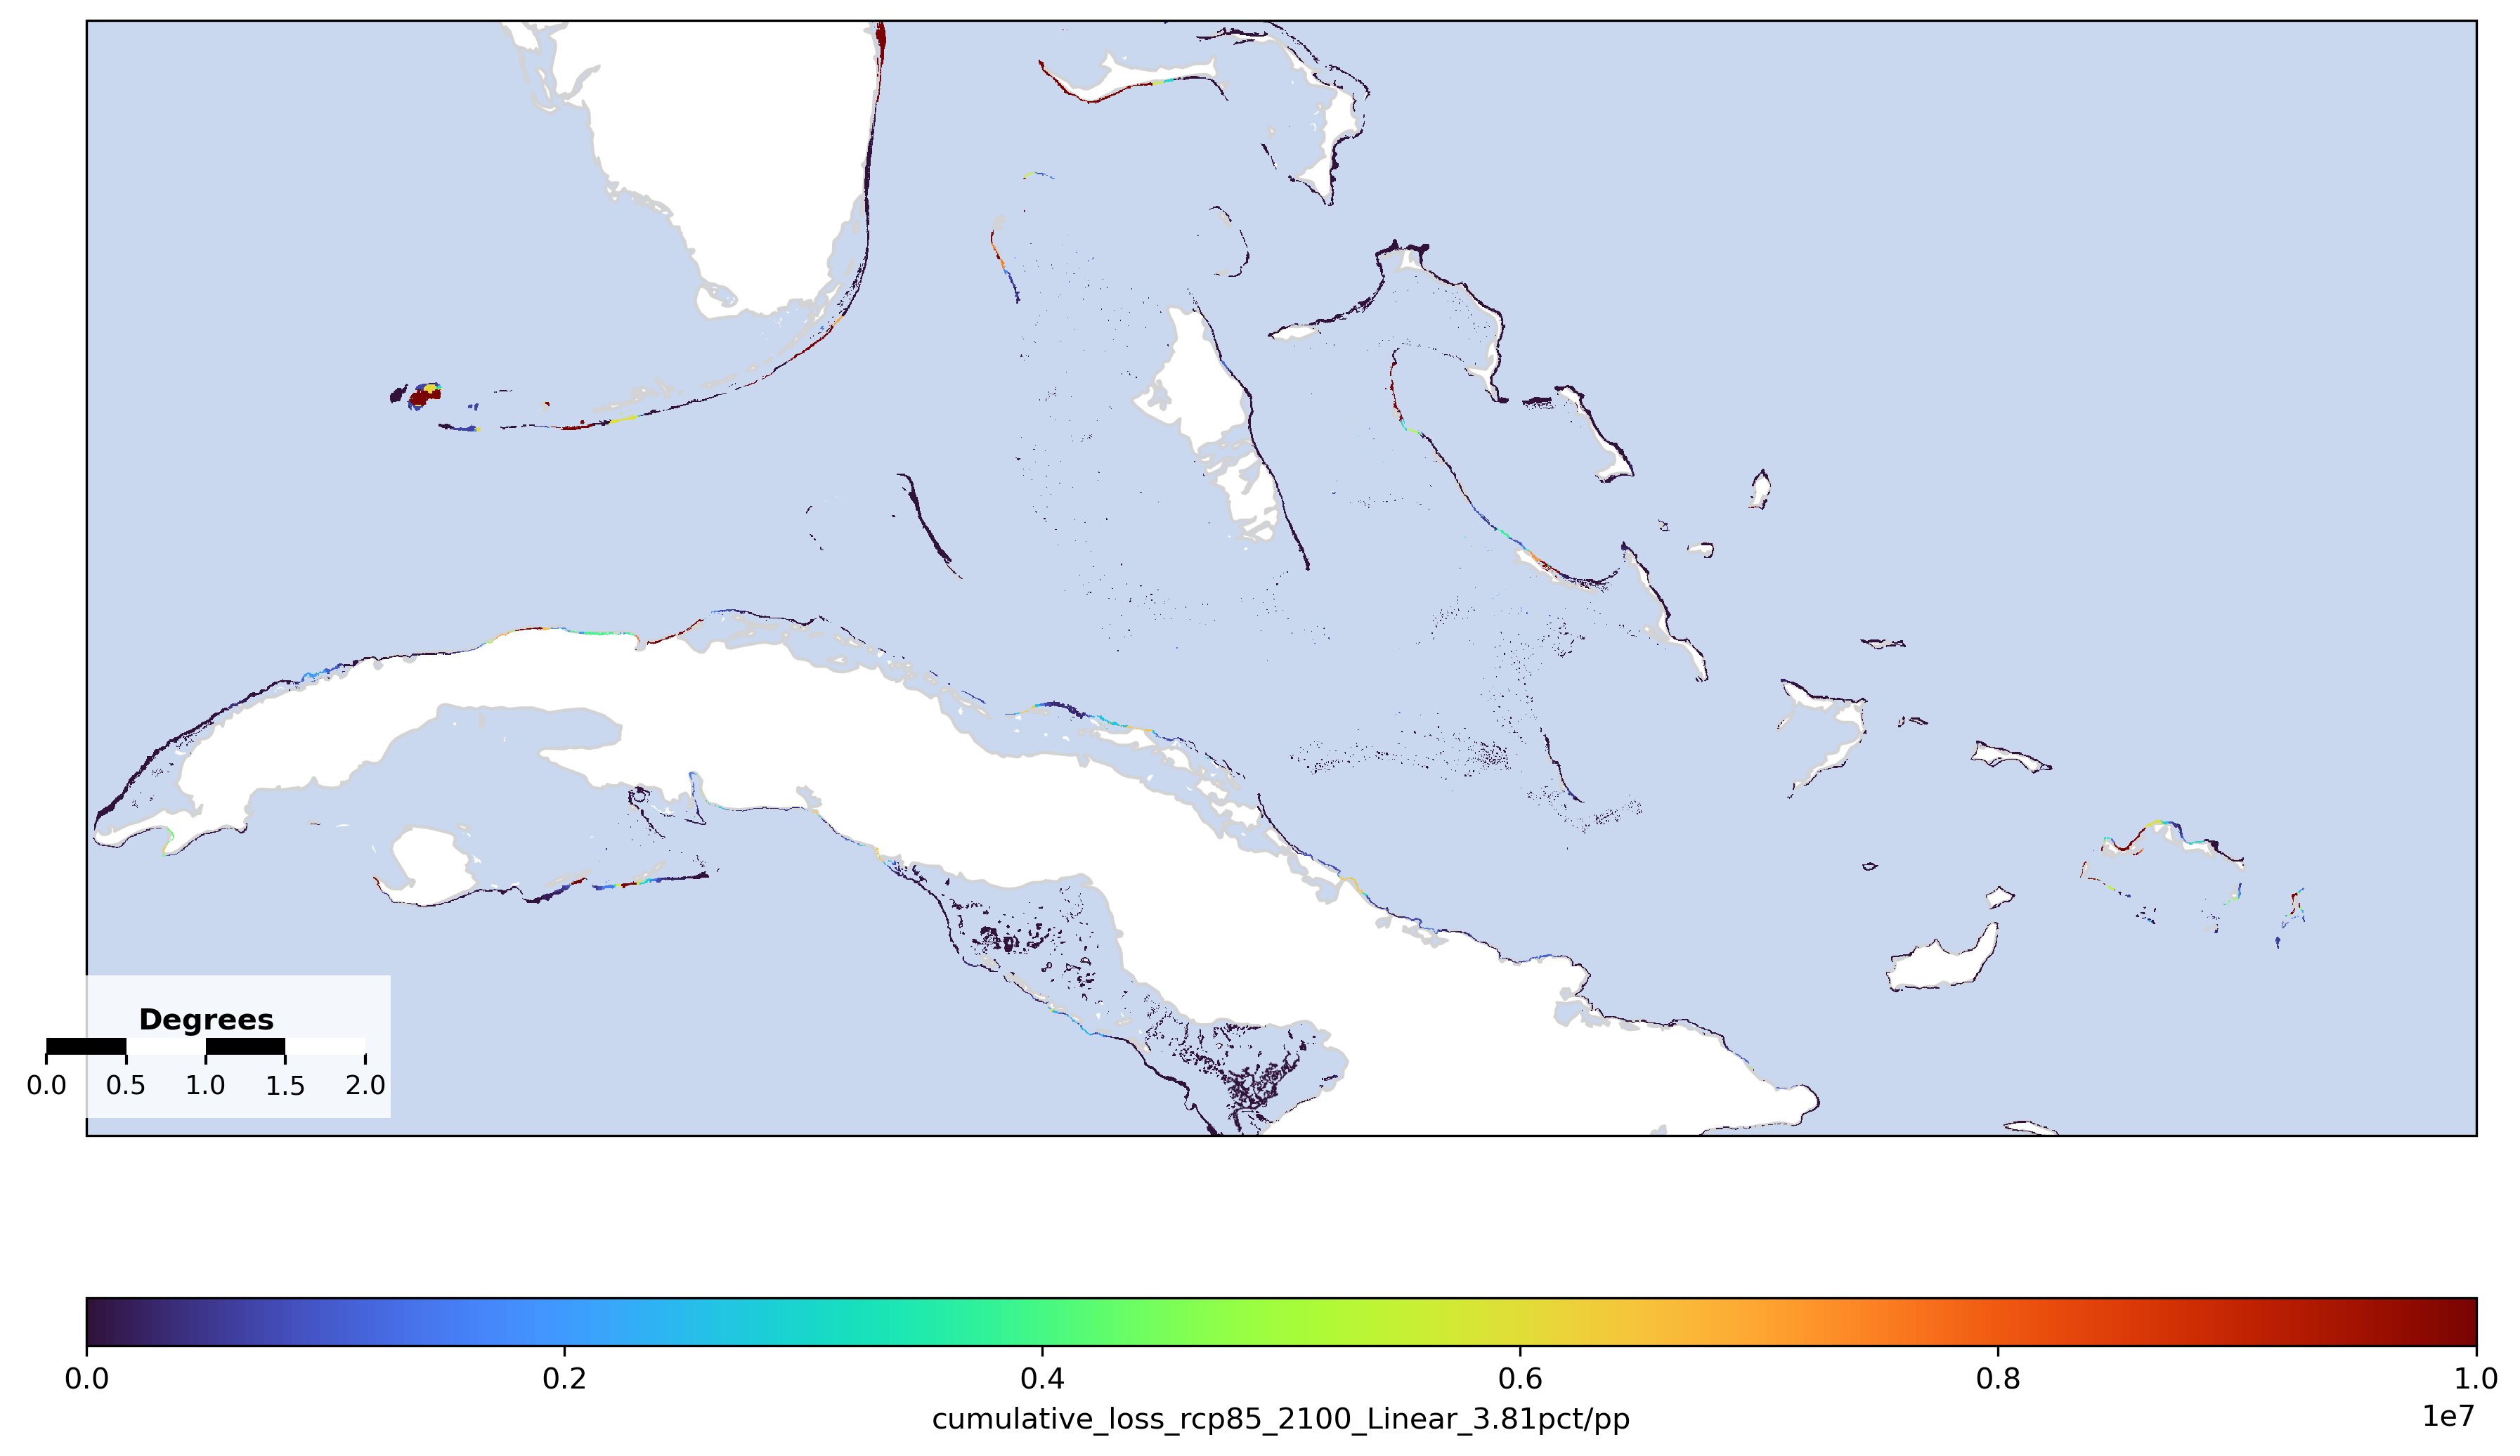

In [4]:
### cumulative
my_config = SpatialPlotConfig(
    # central_longitude=180,
    extent=EXTENT_PRESETS["florida_focus"],
    explode_factor=1,
    # vmin=1,
    vmax=1e7,
    # logarithmic_cbar=True,
    title="",
    figsize=(12, 8),
    show_scalebar=True,
    scalebar_linewidth=5,
    scalebar_length=2,
    scalebar_location=[0.05, 0.08],
    scalebar_frame=True,
)


plotting.plot_spatial_distribution(
    gdf,
    vmin=0,
    config=my_config,
    plot_column="cumulative_loss_rcp85_2100_Linear_3.81pct/pp",
);


In [ ]:
plotting.plot_spatial_distribution(
    gdf,
    bbox=(-83.5, 24, -80, 25),
    plot_column="cumulative_loss_rcp85_2100_Linear_3.81pct/pp",
);


In [ ]:
gdf = prev_results["results"].results["tourism_RCP85_yr_2100_Linear_(3.81%_pp)"].gdf
plotting.plot_spatial_distribution_interactive(
    # gdf,
    # plot_column="value_loss",
    gdf,
    bbox=(-83.5, 24, -80, 25),
    plot_column="cumulative_loss_rcp85_2100_Linear_3.81pct/pp",
)

In [ ]:
from shapely.geometry import box
import matplotlib.cm as cm
import numpy as np
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


tourism_gdp_gdf = (
    gpd.read_file(
        config.tourism_dir
        / "total"
        / "Coral_Reef_Tourism_Global_Total_Dollar_Value.shp"
    )
    .to_crs(epsg=4326)
    .rename(columns=str.lower)
)

prices_key = [
    "no value",
    "up to 4000",
    "4001-8000",
    "8001-12000",
    "12001-24000",
    "24001-44000",
    "44001-92000",
    "92001-172000",
    "172001-352000",
    "352001-908000",
    ">908000",
]
approx_prices = [
    0,
    2000,
    6000,
    10000,
    18000,
    34000,
    68000,
    132000,
    262000,
    630000,
    908000,
]

tourism_gdp_gdf["total_reef_value"] = prices_key
tourism_gdp_gdf["approx_price"] = approx_prices
# Each entry in this list is a color for one price bin.
colormap = [
    "#828282",  # Bin 0
    "#2892c8",  # Bin 1
    "#74b474",  # Bin 2
    "#52bf81",  # Bin 3
    "#59d95e",  # Bin 4
    "#58f230",  # Bin 5
    "#f6e058",  # Bin 6
    "#e6ac3e",  # Bin 7
    "#d57726",  # Bin 7
    "#bf4713",  # Bin 8
    "#730000",  # Bin 9
]
price_cmap = ListedColormap(colormap)

# Define the Caribbean bounding box as a Polygon
caribbean_bounds = box(-85, 0, -60, 30)  # (minx, miny, maxx, maxy)

# Filter multipolygon geometries that intersect the Caribbean area
caribbean_on_reef = tourism_gdp_gdf[
    tourism_gdp_gdf.geometry.intersects(caribbean_bounds)
]

fig, ax = plot_utils.generate_geo_axis()
ax = plot_utils.format_geo_axes(ax)

collection = caribbean_on_reef.plot(
    ax=ax,
    column="bin_global",
    cmap=price_cmap,
    legend=False,
    linewidth=0.2,
    edgecolor=None,
    # legend_kwds={'label': 'On-reef tourism value', 'orientation': 'horizontal'},
)

norm = Normalize(
    vmin=caribbean_on_reef["bin_global"].min(),
    vmax=caribbean_on_reef["bin_global"].max(),
)
sm = cm.ScalarMappable(cmap=price_cmap, norm=norm)
sm.set_array([])
cb = fig.colorbar(
    sm,
    ax=ax,
    label="On-reef tourism value",
    orientation="horizontal",
    pad=0,
    aspect=50,
    ticks=np.linspace(0.5, 9.5, len(approx_prices)),
)
cb.set_ticklabels(prices_key)
cb.ax.tick_params(rotation=45)
# zooming in to compare with the maps online at (Data Layers for Global Recreation and Tourism Coral Reefs) for Ocean Wealth
ax.set_xlim(-83.5, -80)
ax.set_ylim(24, 25)
plt.show()


In [ ]:
prev_results["cumulative_results"].keys()

In [ ]:
prev_results["results"].results["tourism_RCP45_yr_2100_Linear_(3.81%_pp)"].gdf

In [ ]:
prev_results["results"].results.keys()

In [ ]:
from src.economics import plotting

out = plotting.plot_scenario_comparison(prev_results["results"], top_n=5)
# plotting.plot_model_comparison()

In [ ]:
data = run_economic_analysis.step_load_data(verbose=False)

In [ ]:
out = plotting.plot_gdp_impact_scenario_comparison(
    prev_results["results"], gdp_data=data["gdp"], top_n=5
)

In [ ]:
plot_utils.get_wa_colormap(index=(len(plot_utils.WA_COLORMAP) // 2))


In [ ]:
### Plot model examples with enhanced tipping point trajectories
from src.economics import depreciation_models as dms
import matplotlib.patches as mpatches

linear = dms.LinearModel()
tipping_point = dms.TippingPointModel()  # use default threshold=0.1
compound = dms.CompoundModel()

delta_cc_range = np.linspace(0, -1.0, 101)  # 0 to -100pp
value = 100

fig, (ax_linear, ax_compound, ax_tipping_point) = plt.subplots(
    1, 3, dpi=300, figsize=(13, 4), sharey=True, sharex=True
)

# --- Linear Model
y_linear = linear.calculate(delta_cc_range, value)
ax_linear.plot(
    delta_cc_range * 100,
    y_linear,
    color=plot_utils.get_wa_colormap(index=0),
)
# ax_linear.set_title("Linear")
# ax_linear.legend()

# --- Compound Model
y_compound = compound.calculate(delta_cc_range, value)
ax_compound.plot(
    delta_cc_range * 100,
    y_compound,
    color=plot_utils.get_wa_colormap(index=-1),
)
# ax_compound.set_title("Compound")
# ax_compound.legend()

# --- Tipping Point Model (with better communication of trajectories)

colors = [
    plot_utils.get_wa_colormap(index=0),
    plot_utils.get_wa_colormap(index=(len(plot_utils.WA_COLORMAP) // 2)),
    plot_utils.get_wa_colormap(index=-1),
]
initial_covers = [0.15, 0.3, 0.45]

# For legend handles
cover_handles = []
thresh_handles = []

for offset, (i, og_cover) in zip([-1, 0, 1], enumerate(initial_covers)):
    y_tipping_point = tipping_point.calculate(
        delta_cc_range, value + offset * 5, current_cover=og_cover
    )
    # Compute where the tipping point is crossed in terms of coral cover
    cc_trajectory = og_cover + delta_cc_range  # current cover over time
    threshold_cc = tipping_point.threshold_cc

    over_tp = cc_trajectory <= threshold_cc
    cross_idx = over_tp.argmax() if over_tp.any() else None

    # Before/after tipping point: use different linestyles/colors to highlight
    if cross_idx and cross_idx > 0:
        # Before TP
        (l1,) = ax_tipping_point.plot(
            delta_cc_range[:cross_idx] * 100,
            y_tipping_point[:cross_idx],
            color=colors[i],
            alpha=0.8,
            ls="-",
        )
        # After TP
        (l2,) = ax_tipping_point.plot(
            delta_cc_range[cross_idx:] * 100,
            y_tipping_point[cross_idx:],
            color=colors[i],
            alpha=0.8,
            ls="--",
        )
        cover_handles.append(
            mpatches.Patch(color=colors[i], label=f"{og_cover * 100:.0f}% start cover")
        )
    # If threshold is never crossed, still plot for legend
    elif cross_idx == 0 or cross_idx is None:
        (l1,) = ax_tipping_point.plot(
            delta_cc_range * 100,
            y_tipping_point,
            color=colors[i],
            alpha=0.8,
            ls="-",
        )
        cover_handles.append(
            mpatches.Patch(color=colors[i], label=f"{og_cover * 100:.0f}% start cover")
        )

# add threshold-style legend (pre- and post-threshold)
thresh_handles.append(
    mpatches.Patch(
        facecolor="none", edgecolor="grey", label="Pre-threshold", linestyle="-"
    )
)
thresh_handles.append(
    mpatches.Patch(
        facecolor="none",
        edgecolor="grey",
        label="Post-threshold",
        linestyle="--",
        hatch="////",
    )
)
# Alternatively, for more accurate linestyle patches, use Line2D:
from matplotlib.lines import Line2D

thresh_handles = [
    Line2D([0], [0], color="gray", ls="-", label="Pre-threshold"),
    Line2D([0], [0], color="gray", ls="--", label="Post-threshold"),
]

# Place both legends, one for start covers, one for threshold regime
legend1 = ax_tipping_point.legend(
    handles=cover_handles,
    title="Initial Coral Cover",
    fontsize=9,
    loc="upper right",
    frameon=False,
    title_fontproperties={"weight": "bold", "size": 12},
    bbox_to_anchor=(1.0, 1),
)
legend2 = ax_tipping_point.legend(
    handles=thresh_handles,
    title="Threshold regime",
    fontsize=9,
    loc="upper right",
    frameon=False,
    title_fontproperties={"weight": "bold", "size": 12},
    bbox_to_anchor=(1.0, 0.6),
)

legend1._legend_box.align = "left"
legend2._legend_box.align = "left"

ax_tipping_point.add_artist(legend1)  # show both
ax_tipping_point.add_artist(legend2)  # show both

# Shared xlabel
fig.supxlabel("Change in percentage coral cover", fontsize=12, fontweight="bold")

for ax in [ax_linear, ax_compound, ax_tipping_point]:
    ax.axhline(0, color="lightgray", zorder=0, lw=0.8)
    ax.axhline(value, color="lightgray", zorder=0, lw=0.8)
    ax.grid(alpha=0.25)

ax_linear.set_ylabel("Value", fontsize=12, fontweight="bold")
ax_linear.set_xlim(0, -40)
ax_linear.set_xticks(np.arange(-40, 0.1, 10))
ax_linear.set_yticks([0, value])
ax_linear.set_yticklabels([0, r"$V_0$"])

plt.tight_layout()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

cc = np.linspace(0, 1, 100)
threshold = 0.1
value = 100


def linear_function(value, delta_cc):
    remaining = value * (1 + 0.0381 * delta_cc * 100)
    return np.maximum(remaining, 0)


# print(linear_function(value, cc))


def tipping_point_function(value, cc, initial_cover, threshold):
    """
    Linear decline in value at 3.81% per percentage-point loss of coral cover.
    At the threshold, value collapses multiplicatively to 10% and continues
    declining at the same marginal rate.

    Coral cover inputs are fractions in [0, 1].
    """
    r = 0.0381  # per percentage point

    cc = np.asarray(cc)

    # Total coral cover loss in percentage points
    delta_cc = (initial_cover - cc) * 100

    # Baseline linear decline
    baseline = value * (1 - r * delta_cc)

    # Apply tipping-point collapse multiplicatively
    remaining = np.where(cc < threshold, 0.1 * baseline, baseline)

    # Physical bounds
    return np.clip(remaining, 0, value)


# tipping_point_function(value, cc, 0.1)
plt.plot(cc, tipping_point_function(value, cc, 0.2, 0.1))
plt.xlabel("Coral cover")

In [ ]:
prev_results